In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = "train.p"
validation_file="valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import cv2
# TODO: Number of training examples
n_train = np.shape(X_train)[0]

# TODO: Number of validation examples
n_validation = np.shape(X_valid)[0]

# TODO: Number of testing examples.
n_test = np.shape(X_test)[0]

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train[0])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


41


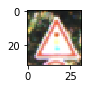

In [4]:
##Index position and corresponding sign displaying
import random
import matplotlib.pyplot as plt
%matplotlib inline

#index = random.randint(0, n_train)
image = X_train[1354].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[0])

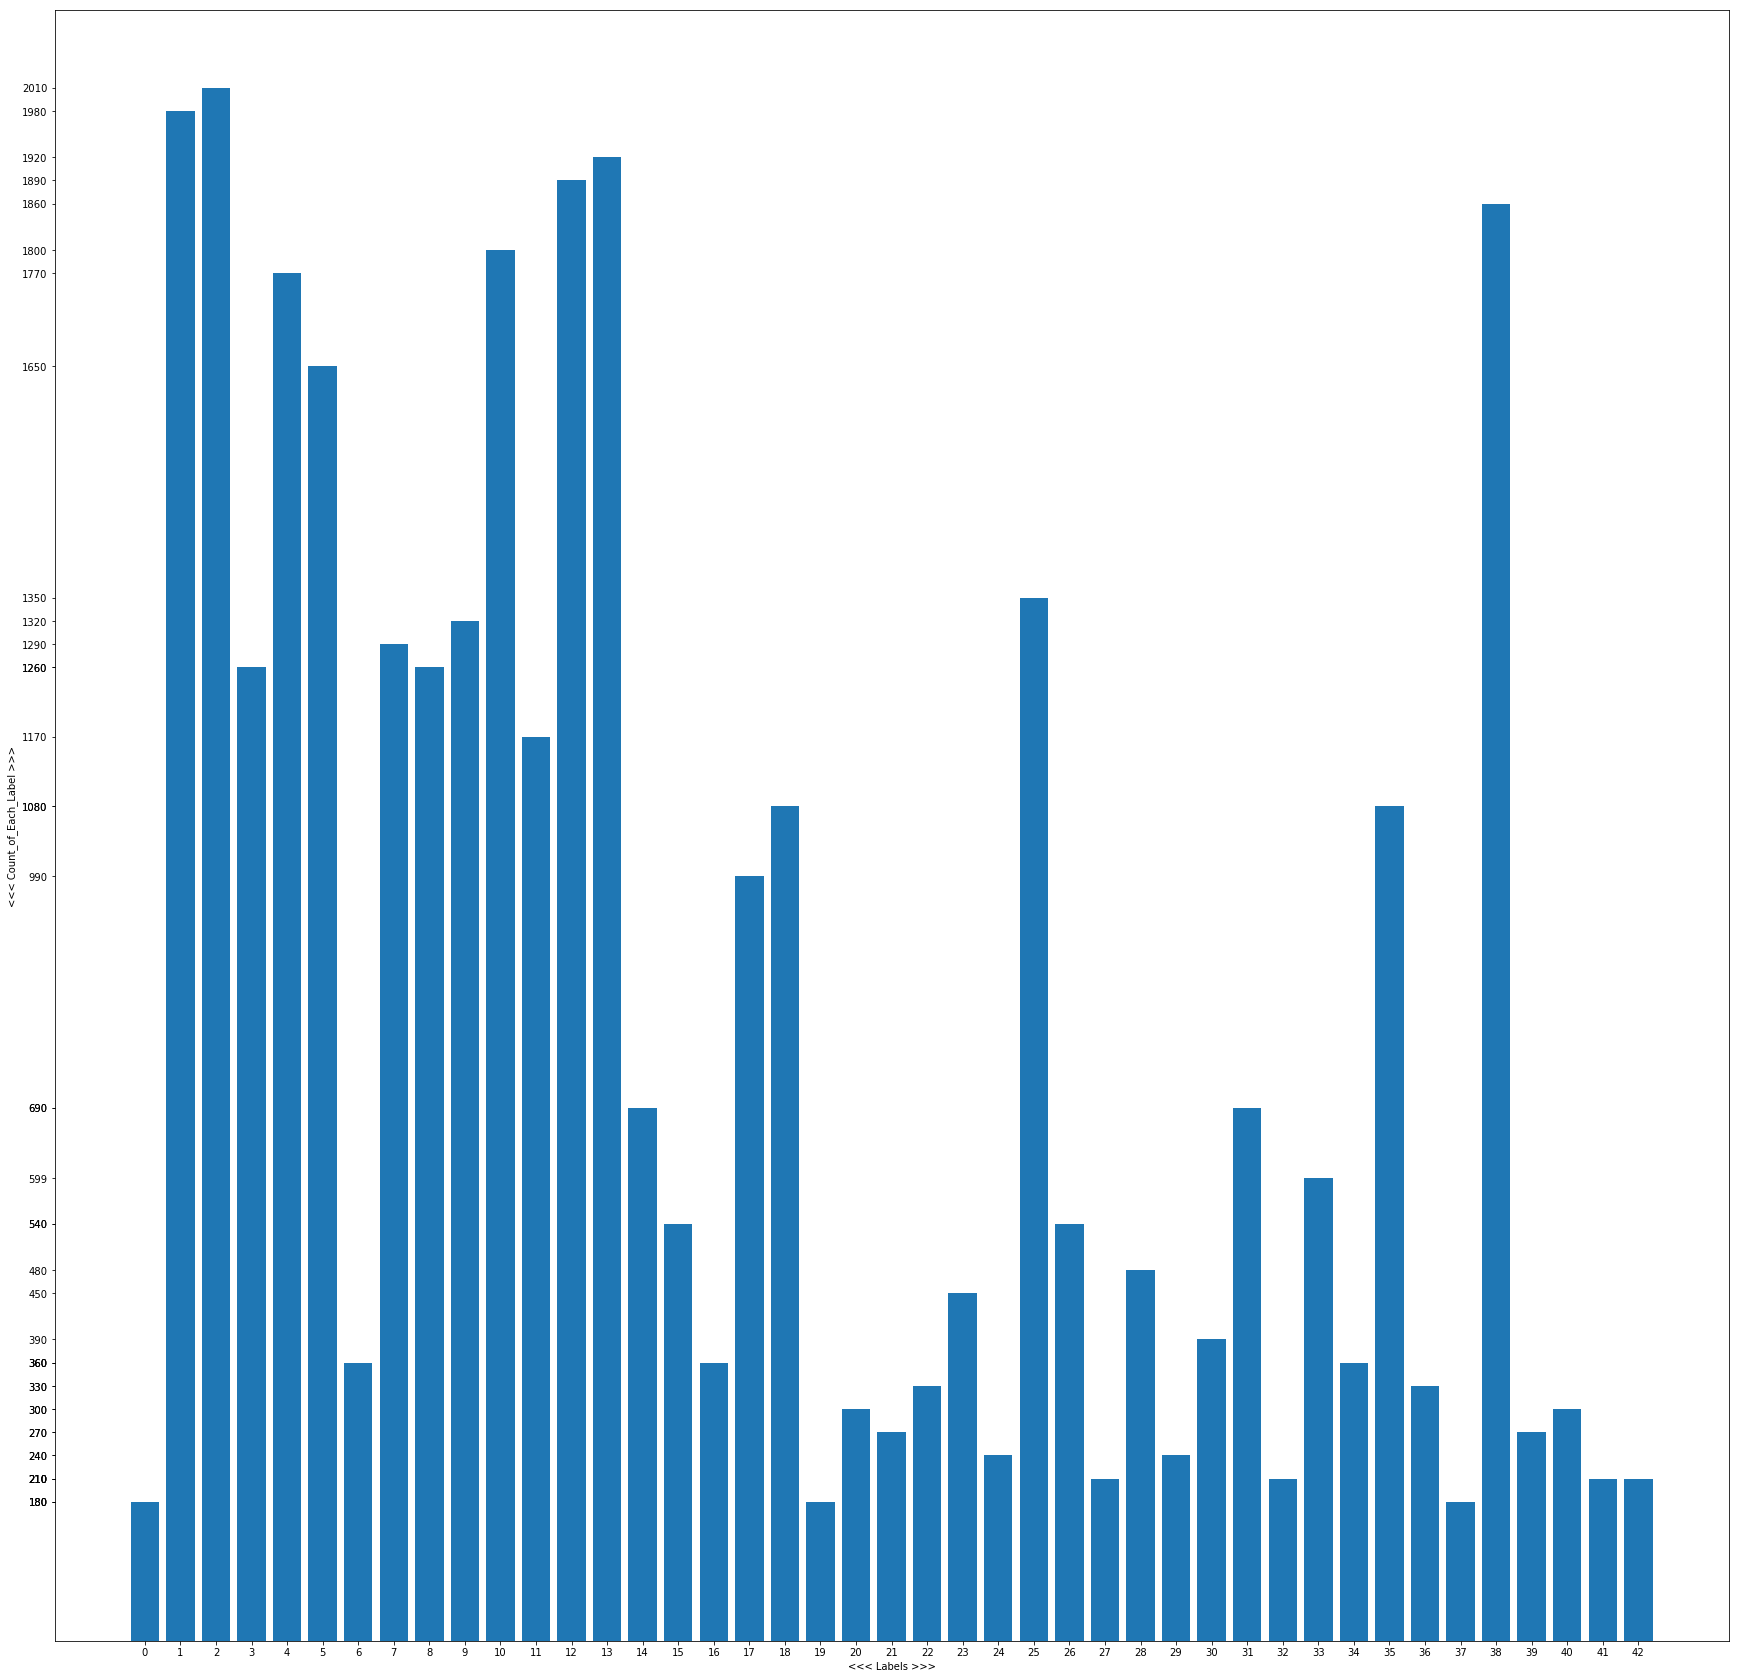

In [5]:
##Visualizing the whole dataset with the labels attached in the matplotlib graph

unique, counts = np.unique(y_train, return_counts=True)
fig = plt.figure(figsize=(30,30))
plt.bar(unique, counts)
plt.xticks(unique, unique)
plt.yticks(counts)
ax = fig.add_subplot(111)
ax.set_xlabel('<<< Labels >>>')
ax.set_ylabel('<<< Count_of_Each_Label >>>')
plt.show()

In [6]:
## Alternate way from rgb to grayscale
# X_train=[cv2.cvtColor(image,cv2.COLOR_RGB2GRAY) for image in X_train]
# X_valid = [cv2.cvtColor(image,cv2.COLOR_RGB2GRAY) for image in X_valid]
# X_test = [cv2.cvtColor(image,cv2.COLOR_RGB2GRAY) for image in X_test]

# #print("Image data shape =", np.shape(X_train[2]))

# # image = new_image.squeeze()
# # plt.figure(figsize=(1,1))
# # plt.imshow(image)
# for i in range(len(X_train)):
#     X_train[i].shape=X_train[i].shape+(1,)
# for i in range(len(X_valid)):
#     X_valid[i].shape=X_valid[i].shape+(1,)
# for i in range(len(X_test)):
#     X_test[i].shape=X_test[i].shape+(1,)

In [7]:
## Normalizing the grayscale images

X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)
X_valid_gry = np.sum(X_valid/3, axis=3, keepdims=True)
X_test_gry=np.sum(X_test/3,axis=3, keepdims=True)
print("Train data shape =", X_train_gry[42].shape)
print("Test data shape =", np.shape(X_test_gry[90]))

Train data shape = (32, 32, 1)
Test data shape = (32, 32, 1)


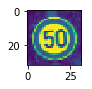

In [8]:
# Plotting the normalized data
index = random.randint(0, len(X_test_gry))
image = X_test_gry[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)
#print(y_train[index])

In [9]:
# Normalizing the data

X_normalized=(X_train_gry-128)/128
X_Valid_Normalized=(X_valid_gry-128)/128
X_Test_Normalized=(X_test_gry-128)/128
print("normalized mean: ",np.mean(X_normalized))
print("normalized mean: ",np.mean(X_Test_Normalized))

normalized mean:  -0.354081335648
normalized mean:  -0.358215153428


In [10]:
##Printing the shape of  whole data set
print("Original shape:", X_train_gry.shape)
print("Normalized shape:", X_normalized.shape)

Original shape: (34799, 32, 32, 1)
Normalized shape: (34799, 32, 32, 1)


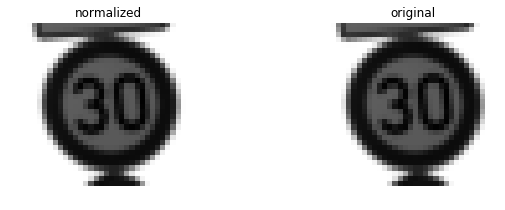

In [11]:
## Ploting the normalized and the original grayscale image

fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('normalized')
axs[0].imshow(X_normalized[3479].squeeze(), cmap='gray')

axs[1].axis('off')
axs[1].set_title('original')
axs[1].imshow(X_train_gry[3479].squeeze(), cmap='gray')

In [12]:
## Function for scaling, translation and brightness

import cv2
def translate_image(image):
    rows,cols,_=image.shape
    pix_pos=2
    pX,pY=np.random.randint(-pix_pos,pix_pos,2)
    mat=np.float32([[1,0,pX],[0,1,pY]])
    ret_image = cv2.warpAffine(image,mat,(cols,rows))
    ret_image = ret_image[:,:,np.newaxis]
    return ret_image
def scale_image(image):
    rows,cols,_=image.shape
    pX=np.random.randint(-2,2)
    pix_trans_1=np.float32([[pX,pX],[rows-pX,pX],[pX,cols-pX],[rows-pX,cols-pX]])
    pix_trans_2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])
    mat = cv2.getPerspectiveTransform(pix_trans_1,pix_trans_2)
    ret_image=cv2.warpPerspective(image,mat,(rows,cols))
    ret_image = ret_image[:,:,np.newaxis]
    return ret_image

def bright_image(image):
    pix_shift=image + 1.0
    max_pix_value=max(pix_shift.flatten())
    coefficient_max=2.0/max_pix_value
    coefficient_min=coefficient_max-1.0
    coefficient_ideal=np.random.uniform(coefficient_min, coefficient_max)
    ret_image = pix_shift * coefficient_ideal - 1.0
    return ret_image

In [13]:
#attaching the enhanced image(scaled,translated,brighter) to the actual dataset.
from tqdm import *
for nth_class in tqdm(range(n_classes)):
    per_class_indices = np.where(y_train == nth_class)
    limit_samples = len(per_class_indices[0])
    if limit_samples < 800:
        for i in range(800 - limit_samples):
            new_image = X_normalized[per_class_indices[0][i % limit_samples]]
            new_image = translate_image(scale_image(bright_image(new_image)))
            X_normalized = np.concatenate((X_normalized, [new_image]), axis=0)
            y_train = np.concatenate((y_train, [nth_class]), axis=0)       
print('X, y shapes:', X_normalized.shape, y_train.shape)

100%|██████████| 43/43 [27:28<00:00, 78.79s/it]

X, y shapes: (46480, 32, 32, 1) (46480,)


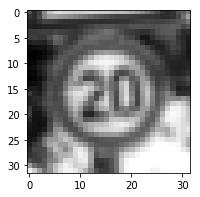

In [15]:
## Printing the augmented image
fig, axs = plt.subplots(1,1, figsize=(10, 3))
axs.imshow(X_normalized[34870].squeeze(), cmap='gray')  

In [16]:
## shuffling the dataset in order to get better trainging output
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_normalized, y_train)
X_valid, y_valid = shuffle(X_Valid_Normalized,y_valid)
X_test, y_test= shuffle(X_Test_Normalized,y_test)

In [17]:
## Spliting the dataset
## Here It should be noted that I will train and validate algorithm 
## with both splitted dataset as well as the given validation dataset (valid.p)

from sklearn.model_selection import train_test_split

X_train, X_split_valid, y_train, y_split_valid = train_test_split(X_train, y_train, 
                                                                test_size=0.20, random_state=42)

In [18]:
## Choosing suitable epochs, later on we can tweak these to get better accuracy

import tensorflow as tf
EPOCHS = 60
BATCH_SIZE = 100

In [19]:
## General LeNet pipeline with dropouts added. 

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    print("layer 1 shape:",conv1.get_shape())

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Layer 3: Convolutional. Output = 1x1x400
    
    conv3_W  = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(400))
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # TODO: Activation.
    conv3 = tf.nn.relu(conv3)
    
    

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Flatten. Input = 1x1x400. Output = 400.
    fc00   = flatten(conv3)
    
    # Concat fc0 and fc00. Input = 400 + 400. Output = 800
    fc0 = tf.concat_v2([fc00, fc0], 1)
    print("x shape:",x.get_shape())
    
    # Dropout
    x = tf.nn.dropout(fc0, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 800. Output = 43.
    W4 = tf.Variable(tf.truncated_normal(shape=(800, n_classes), mean = mu, stddev = sigma))
    b4 = tf.Variable(tf.zeros(n_classes))    
    logits = tf.add(tf.matmul(x, W4), b4)
    
    
    
#     # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
#     fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
#     fc1_b = tf.Variable(tf.zeros(120))
#     fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
#     # SOLUTION: Activation.
#     fc1    = tf.nn.relu(fc1)

#     # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
#     fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
#     fc2_b  = tf.Variable(tf.zeros(84))
#     fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
#     # SOLUTION: Activation.
#     fc2    = tf.nn.relu(fc2)

#     # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
#     fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes ), mean = mu, stddev = sigma))
#     fc3_b  = tf.Variable(tf.zeros(n_classes))
#     logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [20]:
## Creating tensor fow graph

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32) # probability to keep units

In [21]:
## Assigning the learning rate and calling the LeNet pipeline

rate = 0.001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits( labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

layer 1 shape: (?, 28, 28, 6)
x shape: (?, 32, 32, 1)


In [22]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [23]:
## This is the starting point for running the pipeline

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.822

EPOCH 2 ...
Validation Accuracy = 0.902

EPOCH 3 ...
Validation Accuracy = 0.920

EPOCH 4 ...
Validation Accuracy = 0.920

EPOCH 5 ...
Validation Accuracy = 0.942

EPOCH 6 ...
Validation Accuracy = 0.933

EPOCH 7 ...
Validation Accuracy = 0.933

EPOCH 8 ...
Validation Accuracy = 0.939

EPOCH 9 ...
Validation Accuracy = 0.941

EPOCH 10 ...
Validation Accuracy = 0.945

EPOCH 11 ...
Validation Accuracy = 0.943

EPOCH 12 ...
Validation Accuracy = 0.947

EPOCH 13 ...
Validation Accuracy = 0.942

EPOCH 14 ...
Validation Accuracy = 0.940

EPOCH 15 ...
Validation Accuracy = 0.949

EPOCH 16 ...
Validation Accuracy = 0.950

EPOCH 17 ...
Validation Accuracy = 0.942

EPOCH 18 ...
Validation Accuracy = 0.955

EPOCH 19 ...
Validation Accuracy = 0.953

EPOCH 20 ...
Validation Accuracy = 0.950

EPOCH 21 ...
Validation Accuracy = 0.945

EPOCH 22 ...
Validation Accuracy = 0.952

EPOCH 23 ...
Validation Accuracy = 0.966

EPOCH 24 ...
Validation Accura

In [24]:
## Testing the test.p dataset using the saved model 
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.940


In [47]:
## Testing our saved model on some random german traffic signs
import os
import matplotlib.image as mpimg
ext_data=[]
ext_label=[0,40,35,1,12,34]
for file in os.listdir("German_Traffic_signs"):
    initial_img=mpimg.imread("German_Traffic_signs/"+file)
    ext_data.append(initial_img)
    print(initial_img.shape)
    print(file)

(32, 32, 3)
limit_20.jpg
(32, 32, 3)
circle.jpg
(32, 32, 3)
forward.jpg
(32, 32, 3)
limit_30.jpg
(32, 32, 3)
stop.jpg
(32, 32, 3)
turn_left.jpg


In [48]:
print(len(ext_data))

6


In [49]:
ext_data_gry=[cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in ext_data]

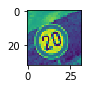

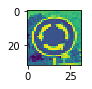

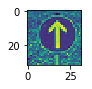

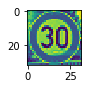

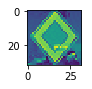

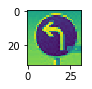

In [60]:
## Image visualization as per the index
for i in range(len(ext_data_gry)):
    image = ext_data_gry[i].squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image)

In [ ]:
# # Normalizing the data
# ext_data_gry[:] = [(x - 128)/128 for x in ext_data_gry]
# #ext_data_Nor=(-128)/128
# print("normalized mean: ",np.mean(ext_data_gry))

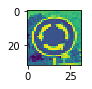

In [51]:
index = random.randint(0, len(ext_data_gry)-1)
image = ext_data_gry[1].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)

In [52]:
for i in range(len(ext_data_gry)):
    ext_data_gry[i].shape=ext_data_gry[i].shape+(1,)
    print(ext_data_gry[i].shape)

(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)


In [58]:
## Testing the external images using the saved model 
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(ext_data_gry, ext_label)
    #top_5=sess.run(tf.nn.top_k(logits, k=5),feed_dict={x: ext_data_gry, y: ext_label, keep_prob: 1.0})
    temp_value=tf.nn.softmax(logits)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    top_5=sess.run(tf.nn.top_k(temp_value, k=5),feed_dict={x: ext_data_gry, y: ext_label, keep_prob: 1.0})
    print(top_5)

Test Accuracy = 0.833
TopKV2(values=array([[  1.00000000e+00,   1.43365871e-37,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]], dtype=float32), indices=array([[40,  0,  1,  2,  3],
       [40,  0,  1,  2,  3],
       [35,  0,  1,  2,  3],
       [ 1,  0,  2,  3,  4],
       [12,  0,  1,  2,  3],
       [34,  0,  1,  2,  3]], dtype=int32))


In [59]:
data=top_5[0] #print(top_5[0][0][0])
for i in range(len(data)):
    for num in range(len(data[i])):
        top_5[0][i][num]="{:.3f}".format(data[i][num])
print(top_5)

TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[40,  0,  1,  2,  3],
       [40,  0,  1,  2,  3],
       [35,  0,  1,  2,  3],
       [ 1,  0,  2,  3,  4],
       [12,  0,  1,  2,  3],
       [34,  0,  1,  2,  3]], dtype=int32))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


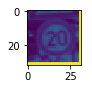

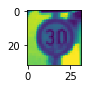

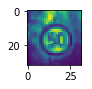

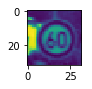

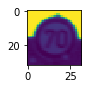

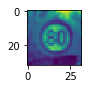

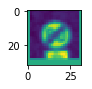

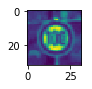

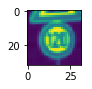

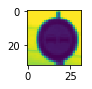

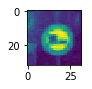

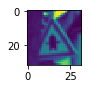

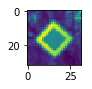

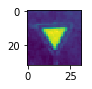

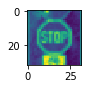

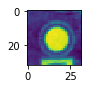

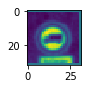

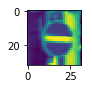

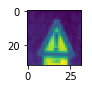

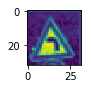

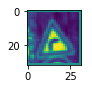

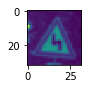

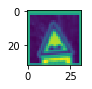

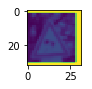

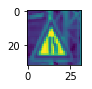

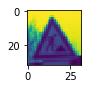

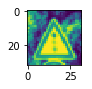

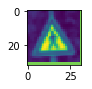

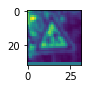

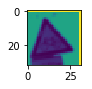

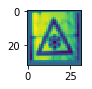

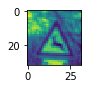

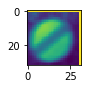

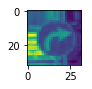

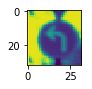

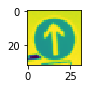

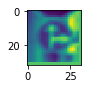

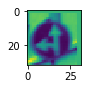

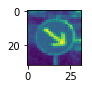

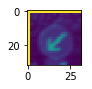

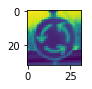

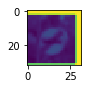

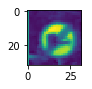

In [55]:
##Index position and corresponding sign displaying
import random
import matplotlib.pyplot as plt
%matplotlib inline

#index = random.randint(0, n_train)
flag=True
for i in range(0,43):
    flag=True
    for j in range(len(y_train)):
        if(i==y_train[j] and flag==True):
            image = X_train[j].squeeze()
            plt.figure(figsize=(1,1))
            plt.imshow(image)
            print(y_train[j])
            flag=False